### Basic image processing with OpenCV
***
In this notebook some of the basic image processing commands with OpenCV is demonstrated.
1. Import and show image
2. Crop image
3. Image thresholding
4. Gaussian noise filtering
5. Save an image
6. Face detection

A color image is a 3D array of red, green, and blue channels light intensities. For 8 bit camera light intensities change from 0 to 255, with 255 being the highest light intensity.
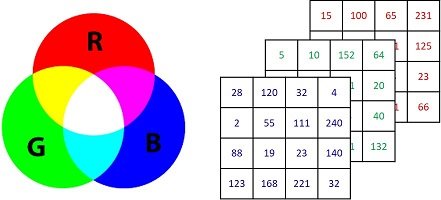

### Import libraries

In [1]:
import cv2                                              # Import OpenCV for image processing
from matplotlib import pyplot as plt                    # Import matplotlib for plotting

print(cv2.__version__)                                  # print OpenCV version

4.1.1


### 1. Import and show image

In [2]:
img = cv2.imread('./images/dog.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                # convert BGR to RGB
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)              # convert RGB to grayscale

In [3]:
print(type(gray))                                         # print type of object gray
print(gray.shape)                                         # 2D array of light intensities

<class 'numpy.ndarray'>
(2935, 4403)


In [4]:
print(type(img))                                         # print type of object img
print(img.shape)                                         # 3D array of light intensities

<class 'numpy.ndarray'>
(2935, 4403, 3)


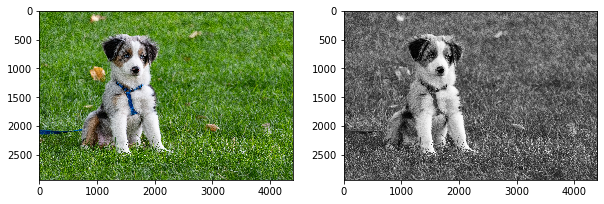

In [5]:
plt.figure(figsize = (10,10))                            # specify plot size
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(gray, cmap = 'gray')

### 2. Cropping image

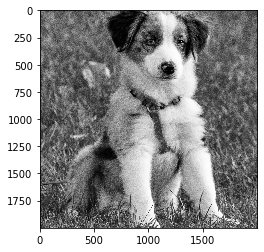

In [6]:
cropped = gray[500:2500,500:2500]                  # crop pixels 500-2500 in x and y directions
plt.imshow(cropped, cmap = 'gray')

### 3. Image thresholding

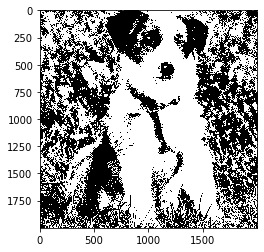

In [7]:
ret,thresh = cv2.threshold(cropped,100,255,cv2.THRESH_BINARY)     # pixel values larger than than 100 mapped to 255
plt.imshow(thresh, cmap = 'gray')                                 # pixel values smaller than than 100 mapped to 0

### 4. Noise filtering

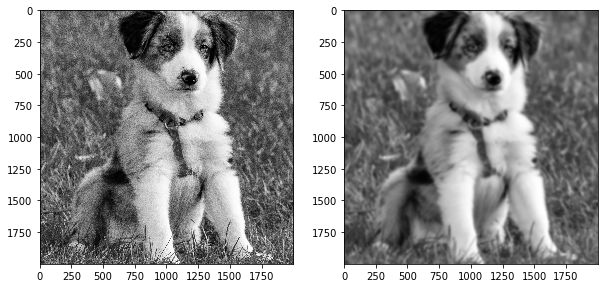

In [8]:
blur = cv2.GaussianBlur(cropped, (51, 51), 0)

plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(cropped, cmap = 'gray')
plt.subplot(122)
plt.imshow(blur, cmap = 'gray')

### 5. Save an image

In [9]:
cv2.imwrite("./images/blur_cropped.jpg", blur)

True

***
## 6. Face detection with Haarcascade
Haar Cascade is object detection algorithm used to identify and classify objects in an image or video using some features in the image

In [10]:
import cv2
import numpy as np

# Import Haarcascade model parameters
face_cascade = cv2.CascadeClassifier('./models/haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./models/haar/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('./models/haar/haarcascade_smile.xml') 

In [11]:
img = cv2.imread('./images/smile.jpg')                        # import image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                  # convert to grayscale

faces = face_cascade.detectMultiScale(gray, 1.3, 5)           # detect faces in the image
print(faces)                                                  # print output with coordinate of corners of detected faces

[[420  83 152 152]]


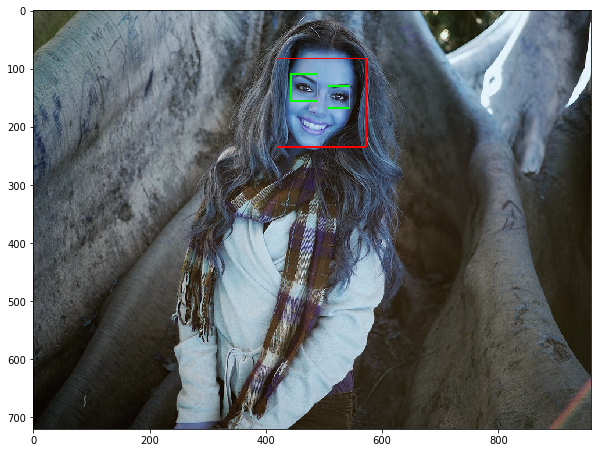

In [12]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)            # draw red rectangle on detected faces
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)                   # detect eyes within roi where face is detected
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)      # detect smile within roi where face is detected
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  # draw green rectangle on detected eyes
        
plt.figure(figsize = (10,10))
plt.imshow(img)                                     # plot image with detected faces and eyes